In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import glob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [3]:
pd.options.display.max_columns=None

In [4]:
pd.options.display.float_format = '{:.3f}'.format

In [5]:
concatenado_unidades = pd.read_parquet('/content/drive/MyDrive/Cópia arquivos Python+TCC/4 BACTÉRIAS SELECIONADAS.parquet')
concatenado_unidades

,Região Geográfica,UF,Município,Date_x,Nome do manancial superficial,Categoria do manancial superficial,Unidade,Resultado,Choveu,Profundidade,TempAr,TempAmostra,pH,Turbidez,CondutividadeEletrica,DBO,OD,SolTotais,SolSuspensaoTotais,SolDissolvidosTotais,NitrogenioTotal,NitrogenioAmoniacal,Nitratos,FosforoTotal,Clorofila,Classe
49,SUL,RS,CAMPO BOM,2016-10-11,DOS SINOS,rio,Aphanocapsa sp.,0.000,0.000,0.200,21.000,12.500,6.460,57.000,44.300,2.000,10.210,NaN,10.000,36.000,NaN,0.110,NaN,0.062,NaN,0
50,SUL,RS,CAMPO BOM,2016-10-11,DOS SINOS,rio,Aphanocapsa sp.,0.000,0.000,0.200,25.900,20.300,7.150,5.000,66.700,2.000,8.400,NaN,10.000,98.000,NaN,0.195,NaN,0.116,NaN,0
78,SUL,RS,SAO LEOPOLDO,2016-10-18,RIO DOS SINOS,rio,Aphanocapsa sp.,17.000,1.000,0.200,18.000,21.090,6.780,71.000,80.700,7.000,5.870,NaN,150.000,65.000,NaN,0.862,0.870,0.575,NaN,0
79,SUL,RS,SAO LEOPOLDO,2016-10-18,RIO DOS SINOS,rio,Aphanocapsa sp.,17.000,1.000,0.200,18.000,21.160,6.770,81.000,82.400,9.000,5.370,NaN,168.000,81.000,NaN,0.717,0.890,0.769,NaN,0
80,SUL,RS,SAO LEOPOLDO,2016-10-18,RIO DOS SINOS,rio,Aphanocapsa sp.,17.000,1.000,0.200,18.000,20.550,6.840,66.000,82.100,7.000,6.710,NaN,156.000,92.000,NaN,0.931,0.880,0.655,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6355,SUDESTE,RJ,RESENDE,2018-12-17,RIO PARAIBA DO SUL,rio,Microcystis sp.,30.000,0.000,0.200,28.000,24.900,7.180,33.400,NaN,NaN,7.520,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
6360,SUDESTE,RJ,RESENDE,2017-06-12,RIO PARAIBA DO SUL,rio,Microcystis sp.,16.000,0.000,0.200,29.000,23.170,7.680,2.700,91.900,NaN,7.400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
6363,SUDESTE,RJ,RESENDE,2018-12-17,RIO PARAIBA DO SUL,rio,Microcystis sp.,0.000,0.000,0.200,28.000,24.900,7.180,33.400,NaN,NaN,7.520,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
6422,SUDESTE,RJ,RESENDE,2017-06-12,RIO PARAIBA DO SUL,rio,Microcystis sp.,52.000,0.000,0.200,29.000,23.170,7.680,2.700,91.900,NaN,7.400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


## *Início*

In [6]:
df_cylindrospermopsis = concatenado_unidades[concatenado_unidades['Unidade']=='Cylindrospermopsis sp.']
df_cylindrospermopsis.describe()

,Resultado,Choveu,Profundidade,TempAr,TempAmostra,pH,Turbidez,CondutividadeEletrica,DBO,OD,SolTotais,SolSuspensaoTotais,SolDissolvidosTotais,NitrogenioTotal,NitrogenioAmoniacal,Nitratos,FosforoTotal,Clorofila,Classe
count,7023.000,4461.000,2915.000,6159.000,6731.000,6624.000,6320.000,1356.000,3444.000,6482.000,2679.000,2920.000,3564.000,1972.000,3130.000,3052.000,3382.000,2859.000,7023.000
mean,6736.681,0.110,0.645,26.935,24.655,7.159,38.549,126.572,4.156,7.389,192.564,74.704,191.346,1.515,0.723,36.036,0.122,14.054,0.045
std,74684.301,0.320,2.822,4.705,5.172,0.983,181.157,519.964,13.814,8.401,566.922,730.961,1580.151,2.149,2.905,523.599,0.370,223.740,0.208
min,0.000,0.000,0.000,0.000,0.000,0.000,-0.270,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.000,0.000,0.200,24.600,22.020,6.750,4.340,45.275,2.000,6.110,59.000,10.000,50.000,1.000,0.100,0.040,0.020,0.954,0.000
50%,0.000,0.000,0.300,27.100,25.080,7.200,11.000,68.450,2.000,7.140,92.000,50.000,69.000,1.000,0.300,0.240,0.039,1.500,0.000
75%,91.000,0.000,0.500,30.000,27.800,7.633,28.000,94.525,3.000,7.930,156.000,50.000,108.000,1.260,0.400,0.760,0.100,3.690,0.000
max,2648208.000,2.000,72.600,42.900,265.000,14.000,8600.000,8510.000,465.000,290.000,12097.000,27720.000,51860.000,32.400,62.200,21450.000,11.000,8339.760,1.000


In [7]:
df_cylindrospermopsis['Classe'].value_counts()

,count
Classe,
0,6705
1,318


In [8]:
df_cylindrospermopsis['Choveu'].value_counts()

,count
Choveu,
0.000,3979
1.000,472
2.000,10


In [ ]:
#df_cylindrospermopsis = df_cylindrospermopsis[df_cylindrospermopsis['Choveu']!=2]

In [9]:
df_cylindrospermopsis.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7023 entries, 51 to 0
Data columns (total 26 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Região Geográfica                   7023 non-null   object 
 1   UF                                  7023 non-null   object 
 2   Município                           7023 non-null   object 
 3   Date_x                              7023 non-null   object 
 4   Nome do manancial superficial       7023 non-null   object 
 5   Categoria do manancial superficial  7023 non-null   object 
 6   Unidade                             7023 non-null   object 
 7   Resultado                           7023 non-null   float64
 8   Choveu                              4461 non-null   float64
 9   Profundidade                        2915 non-null   float64
 10  TempAr                              6159 non-null   float64
 11  TempAmostra                         6731 non-null 

In [10]:
df_cylindrospermopsis.head(5)

,Região Geográfica,UF,Município,Date_x,Nome do manancial superficial,Categoria do manancial superficial,Unidade,Resultado,Choveu,Profundidade,TempAr,TempAmostra,pH,Turbidez,CondutividadeEletrica,DBO,OD,SolTotais,SolSuspensaoTotais,SolDissolvidosTotais,NitrogenioTotal,NitrogenioAmoniacal,Nitratos,FosforoTotal,Clorofila,Classe
51,SUL,RS,CAMPO BOM,2016-10-11,DOS SINOS,rio,Cylindrospermopsis sp.,0.000,0.000,0.200,21.000,12.500,6.460,57.000,44.300,2.000,10.210,NaN,10.000,36.000,NaN,0.110,NaN,0.062,NaN,0
52,SUL,RS,CAMPO BOM,2016-10-11,DOS SINOS,rio,Cylindrospermopsis sp.,0.000,0.000,0.200,25.900,20.300,7.150,5.000,66.700,2.000,8.400,NaN,10.000,98.000,NaN,0.195,NaN,0.116,NaN,0
85,SUL,RS,SAO LEOPOLDO,2017-05-23,RIO DOS SINOS,rio,Cylindrospermopsis sp.,53.000,0.000,0.500,22.000,18.800,7.620,56.200,84.200,NaN,5.450,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
146,SUL,RS,NOVA SANTA RITA,2018-10-20,DOS SINOS,rio,Cylindrospermopsis sp.,0.000,0.000,0.500,27.000,21.900,6.900,26.900,61.500,NaN,7.600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
175,SUL,RS,SANTO ANTONIO DA PATRULHA,2017-04-03,RIO DOS SINOS,rio,Cylindrospermopsis sp.,0.000,0.000,0.500,24.000,22.200,7.400,7.600,89.300,NaN,8.400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [11]:
# ESTAÇÕES DO ANO

# Converte a coluna Date_x para datetime
df_cylindrospermopsis['Date_x'] = pd.to_datetime(df_cylindrospermopsis['Date_x'])

# Tabela com as datas de início das estações do ano (hemisfério sul)
estacoes_inicio = {
    2014: {'Verao': '2013-12-21', 'Outono': '2014-03-20', 'Inverno': '2014-06-21', 'Primavera': '2014-09-23'},
    2015: {'Verao': '2014-12-21', 'Outono': '2015-03-20', 'Inverno': '2015-06-21', 'Primavera': '2015-09-23'},
    2016: {'Verao': '2015-12-22', 'Outono': '2016-03-20', 'Inverno': '2016-06-20', 'Primavera': '2016-09-22'},
    2017: {'Verao': '2016-12-21', 'Outono': '2017-03-20', 'Inverno': '2017-06-21', 'Primavera': '2017-09-22'},
    2018: {'Verao': '2017-12-21', 'Outono': '2018-03-20', 'Inverno': '2018-06-21', 'Primavera': '2018-09-22'},
    2019: {'Verao': '2018-12-21', 'Outono': '2019-03-20', 'Inverno': '2019-06-21', 'Primavera': '2019-09-23'},
    2020: {'Verao': '2019-12-22', 'Outono': '2020-03-20', 'Inverno': '2020-06-20', 'Primavera': '2020-09-22'},
    2021: {'Verao': '2020-12-21', 'Outono': '2021-03-20', 'Inverno': '2021-06-21', 'Primavera': '2021-09-22'},
    2022: {'Verao': '2021-12-21', 'Outono': '2022-03-20', 'Inverno': '2022-06-21', 'Primavera': '2022-09-23'},
    2023: {'Verao': '2022-12-21', 'Outono': '2023-03-20', 'Inverno': '2023-06-21', 'Primavera': '2023-09-23'}
}

# Função para determinar a estação do ano
def get_season(date):
    year = date.year
    start_dates = estacoes_inicio.get(year, None)
    if not start_dates:
        return None  # Se o ano não estiver na tabela, retorne None

    verao = pd.Timestamp(start_dates['Verao'])
    outono = pd.Timestamp(start_dates['Outono'])
    inverno = pd.Timestamp(start_dates['Inverno'])
    primavera = pd.Timestamp(start_dates['Primavera'])

    if verao <= date < outono:
        return 'Verao'
    elif outono <= date < inverno:
        return 'Outono'
    elif inverno <= date < primavera:
        return 'Inverno'
    else:
        return 'Primavera'

# Aplica a função para criar uma coluna com a estação
df_cylindrospermopsis['Estacao'] = df_cylindrospermopsis['Date_x'].apply(get_season)

# Cria colunas binárias para cada estação
df_cylindrospermopsis['Verao'] = (df_cylindrospermopsis['Estacao'] == 'Verao').astype(int)
df_cylindrospermopsis['Outono'] = (df_cylindrospermopsis['Estacao'] == 'Outono').astype(int)
df_cylindrospermopsis['Inverno'] = (df_cylindrospermopsis['Estacao'] == 'Inverno').astype(int)
df_cylindrospermopsis['Primavera'] = (df_cylindrospermopsis['Estacao'] == 'Primavera').astype(int)

# Remove a coluna intermediária de estação, se não for mais necessária
df_cylindrospermopsis.drop(columns=['Estacao'], inplace=True)

# Visualizar o resultado
df_cylindrospermopsis.head(5)

<ipython-input-11-fb324a3b5f4c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cylindrospermopsis['Date_x'] = pd.to_datetime(df_cylindrospermopsis['Date_x'])
<ipython-input-11-fb324a3b5f4c>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cylindrospermopsis['Estacao'] = df_cylindrospermopsis['Date_x'].apply(get_season)
<ipython-input-11-fb324a3b5f4c>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

,Região Geográfica,UF,Município,Date_x,Nome do manancial superficial,Categoria do manancial superficial,Unidade,Resultado,Choveu,Profundidade,TempAr,TempAmostra,pH,Turbidez,CondutividadeEletrica,DBO,OD,SolTotais,SolSuspensaoTotais,SolDissolvidosTotais,NitrogenioTotal,NitrogenioAmoniacal,Nitratos,FosforoTotal,Clorofila,Classe,Verao,Outono,Inverno,Primavera
51,SUL,RS,CAMPO BOM,2016-10-11,DOS SINOS,rio,Cylindrospermopsis sp.,0.000,0.000,0.200,21.000,12.500,6.460,57.000,44.300,2.000,10.210,NaN,10.000,36.000,NaN,0.110,NaN,0.062,NaN,0,0,0,0,1
52,SUL,RS,CAMPO BOM,2016-10-11,DOS SINOS,rio,Cylindrospermopsis sp.,0.000,0.000,0.200,25.900,20.300,7.150,5.000,66.700,2.000,8.400,NaN,10.000,98.000,NaN,0.195,NaN,0.116,NaN,0,0,0,0,1
85,SUL,RS,SAO LEOPOLDO,2017-05-23,RIO DOS SINOS,rio,Cylindrospermopsis sp.,53.000,0.000,0.500,22.000,18.800,7.620,56.200,84.200,NaN,5.450,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,0
146,SUL,RS,NOVA SANTA RITA,2018-10-20,DOS SINOS,rio,Cylindrospermopsis sp.,0.000,0.000,0.500,27.000,21.900,6.900,26.900,61.500,NaN,7.600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,1
175,SUL,RS,SANTO ANTONIO DA PATRULHA,2017-04-03,RIO DOS SINOS,rio,Cylindrospermopsis sp.,0.000,0.000,0.500,24.000,22.200,7.400,7.600,89.300,NaN,8.400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,0


In [12]:
df_cylindrospermopsis.head(5)

,Região Geográfica,UF,Município,Date_x,Nome do manancial superficial,Categoria do manancial superficial,Unidade,Resultado,Choveu,Profundidade,TempAr,TempAmostra,pH,Turbidez,CondutividadeEletrica,DBO,OD,SolTotais,SolSuspensaoTotais,SolDissolvidosTotais,NitrogenioTotal,NitrogenioAmoniacal,Nitratos,FosforoTotal,Clorofila,Classe,Verao,Outono,Inverno,Primavera
51,SUL,RS,CAMPO BOM,2016-10-11,DOS SINOS,rio,Cylindrospermopsis sp.,0.000,0.000,0.200,21.000,12.500,6.460,57.000,44.300,2.000,10.210,NaN,10.000,36.000,NaN,0.110,NaN,0.062,NaN,0,0,0,0,1
52,SUL,RS,CAMPO BOM,2016-10-11,DOS SINOS,rio,Cylindrospermopsis sp.,0.000,0.000,0.200,25.900,20.300,7.150,5.000,66.700,2.000,8.400,NaN,10.000,98.000,NaN,0.195,NaN,0.116,NaN,0,0,0,0,1
85,SUL,RS,SAO LEOPOLDO,2017-05-23,RIO DOS SINOS,rio,Cylindrospermopsis sp.,53.000,0.000,0.500,22.000,18.800,7.620,56.200,84.200,NaN,5.450,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,0
146,SUL,RS,NOVA SANTA RITA,2018-10-20,DOS SINOS,rio,Cylindrospermopsis sp.,0.000,0.000,0.500,27.000,21.900,6.900,26.900,61.500,NaN,7.600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,1
175,SUL,RS,SANTO ANTONIO DA PATRULHA,2017-04-03,RIO DOS SINOS,rio,Cylindrospermopsis sp.,0.000,0.000,0.500,24.000,22.200,7.400,7.600,89.300,NaN,8.400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,0


In [13]:
# DELTA DE TEMPERATURA AR - TEMPERATURA AGUA (DELTA T)

df_cylindrospermopsis['Delta T'] = df_cylindrospermopsis['TempAr'] - df_cylindrospermopsis['TempAmostra']
df_cylindrospermopsis['Delta T']

<ipython-input-13-1db4b99af5bf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cylindrospermopsis['Delta T'] = df_cylindrospermopsis['TempAr'] - df_cylindrospermopsis['TempAmostra']


,Delta T
51,8.500
52,5.600
85,3.200
146,5.100
175,1.800
...,...
6334,-0.400
6335,-0.520
6338,3.000
6407,4.200


In [14]:
df_cylindrospermopsis.columns

Index(['Região Geográfica', 'UF', 'Município', 'Date_x',
       'Nome do manancial superficial', 'Categoria do manancial superficial',
       'Unidade', 'Resultado', 'Choveu', 'Profundidade', 'TempAr',
       'TempAmostra', 'pH', 'Turbidez', 'CondutividadeEletrica', 'DBO', 'OD',
       'SolTotais', 'SolSuspensaoTotais', 'SolDissolvidosTotais',
       'NitrogenioTotal', 'NitrogenioAmoniacal', 'Nitratos', 'FosforoTotal',
       'Clorofila', 'Classe', 'Verao', 'Outono', 'Inverno', 'Primavera',
       'Delta T'],
      dtype='object')

In [15]:
features_possiveis_cylindrospermopsis = ['Choveu', 'Profundidade', 'TempAr', 'TempAmostra', 'pH', 'Turbidez','CondutividadeEletrica', 'DBO', 'OD', 'SolTotais', 'SolSuspensaoTotais',
                            'SolDissolvidosTotais', 'NitrogenioTotal', 'NitrogenioAmoniacal', 'Nitratos', 'FosforoTotal', 'Clorofila', 'Primavera','Verao',
                            'Outono','Inverno', 'Verao', 'Outono', 'Inverno', 'Primavera','Delta T']
output_micro = 'Classe'

len(features_possiveis_cylindrospermopsis)

26

In [16]:
df_cylindrospermopsis_c1 = df_cylindrospermopsis[df_cylindrospermopsis['Classe']==1]
df_cylindrospermopsis_c0 = df_cylindrospermopsis[df_cylindrospermopsis['Classe']==0]

In [17]:
df_cylindrospermopsis_c1.describe()

,Date_x,Resultado,Choveu,Profundidade,TempAr,TempAmostra,pH,Turbidez,CondutividadeEletrica,DBO,OD,SolTotais,SolSuspensaoTotais,SolDissolvidosTotais,NitrogenioTotal,NitrogenioAmoniacal,Nitratos,FosforoTotal,Clorofila,Classe,Verao,Outono,Inverno,Primavera,Delta T
count,318,318.000,157.000,111.000,301.000,302.000,306.000,280.000,31.000,215.000,295.000,203.000,192.000,223.000,195.000,224.000,220.000,218.000,198.000,318.000,318.000,318.000,318.000,318.000,291.000
mean,2019-02-22 15:37:21.509433856,127545.513,0.127,0.548,27.464,25.655,7.086,20.636,1864.930,3.936,6.856,470.099,60.647,864.039,1.491,0.485,0.178,0.089,20.608,1.000,0.164,0.198,0.305,0.333,1.659
min,2016-03-11 00:00:00,20000.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,-5.500
25%,2018-03-20 00:00:00,25175.500,0.000,0.200,26.000,23.605,6.620,2.100,57.300,2.000,6.200,74.000,50.000,53.000,1.000,0.400,0.020,0.020,1.040,1.000,0.000,0.000,0.000,0.000,-1.000
50%,2018-10-10 00:00:00,37250.000,0.000,0.390,28.500,27.100,7.310,5.400,103.100,2.000,6.970,100.000,50.000,86.000,1.000,0.400,0.050,0.030,1.945,1.000,0.000,0.000,0.000,0.000,1.500
75%,2020-02-14 00:00:00,67200.000,0.000,0.830,30.700,29.260,7.895,11.550,1585.000,3.000,7.810,222.000,50.000,182.000,1.000,0.400,0.110,0.091,8.925,1.000,0.000,0.000,1.000,1.000,3.555
max,2021-11-08 00:00:00,2648208.000,1.000,1.610,38.500,33.000,9.900,400.000,8510.000,203.550,14.900,12097.000,487.000,51860.000,22.480,12.000,2.900,0.999,1035.600,1.000,1.000,1.000,1.000,1.000,9.900
std,NaN,328646.404,0.334,0.402,5.427,5.306,1.529,59.982,2928.536,13.820,2.007,1299.889,75.813,4991.210,2.154,0.958,0.375,0.138,86.922,0.000,0.370,0.399,0.461,0.472,3.025


In [18]:
# Calculando a porcentagem de valores nulos em cada coluna
null_percentage = (df_cylindrospermopsis_c1.isnull().sum() / len(df_cylindrospermopsis_c1)) * 100

# Criando o dataframe com duas colunas: Feature e Porcentagem
df_cylindrospermopsis_c1_perc = pd.DataFrame({
    "Feature": df_cylindrospermopsis_c1.columns,
    "Porcentagem (%)": null_percentage
}).reset_index(drop=True)

# Formatando a coluna de porcentagem com duas casas decimais
#df_micro_c1_perc["Porcentagem (%)"] = df_micro_c1_perc["Porcentagem (%)"].map("{:.2f}".format)

# Exibindo o dataframe gerado
df_cylindrospermopsis_c1_perc.sort_values(by="Porcentagem (%)", ascending=False)

,Feature,Porcentagem (%)
14,CondutividadeEletrica,90.252
9,Profundidade,65.094
8,Choveu,50.629
18,SolSuspensaoTotais,39.623
20,NitrogenioTotal,38.679
24,Clorofila,37.736
17,SolTotais,36.164
15,DBO,32.390
23,FosforoTotal,31.447
22,Nitratos,30.818


In [19]:
# Calculando a porcentagem de valores nulos em cada coluna
null_percentage = (df_cylindrospermopsis_c0.isnull().sum() / len(df_cylindrospermopsis_c0)) * 100

# Criando o dataframe com duas colunas: Feature e Porcentagem
df_cylindrospermopsis_c0_perc = pd.DataFrame({
    "Feature": df_cylindrospermopsis_c0.columns,
    "Porcentagem (%)": null_percentage
}).reset_index(drop=True)

# Formatando a coluna de porcentagem com duas casas decimais
#df_micro_c1_perc["Porcentagem (%)"] = df_micro_c1_perc["Porcentagem (%)"].map("{:.2f}".format)

# Exibindo o dataframe gerado
df_cylindrospermopsis_c0_perc.sort_values(by="Porcentagem (%)", ascending=False)

,Feature,Porcentagem (%)
14,CondutividadeEletrica,80.239
20,NitrogenioTotal,73.497
17,SolTotais,63.072
24,Clorofila,60.313
18,SolSuspensaoTotais,59.314
9,Profundidade,58.180
22,Nitratos,57.763
21,NitrogenioAmoniacal,56.659
23,FosforoTotal,52.811
15,DBO,51.842


In [ ]:
df_cylindrospermopsis.columns

Index(['Região Geográfica', 'UF', 'Município', 'Date_x',
       'Nome do manancial superficial', 'Categoria do manancial superficial',
       'Unidade', 'Resultado', 'Choveu', 'Profundidade', 'TempAr',
       'TempAmostra', 'pH', 'Turbidez', 'CondutividadeEletrica', 'DBO', 'OD',
       'SolTotais', 'SolSuspensaoTotais', 'SolDissolvidosTotais',
       'NitrogenioTotal', 'NitrogenioAmoniacal', 'Nitratos', 'FosforoTotal',
       'Clorofila', 'Classe', 'Verao', 'Outono', 'Inverno', 'Primavera',
       'Delta T'],
      dtype='object')

In [20]:
colunas_50_manter = df_cylindrospermopsis_c1_perc[df_cylindrospermopsis_c1_perc['Porcentagem (%)']<=50]

colunas_50_manter = colunas_50_manter.sort_values(by='Porcentagem (%)', ascending=False)['Feature']
colunas_50_manter.reset_index(drop=True).head(28)

,Feature
0,SolSuspensaoTotais
1,NitrogenioTotal
2,Clorofila
3,SolTotais
4,DBO
5,FosforoTotal
6,Nitratos
7,SolDissolvidosTotais
8,NitrogenioAmoniacal
9,Turbidez


In [21]:
df_cylindrospermopsis_50 = df_cylindrospermopsis[colunas_50_manter.head(28)]
df_cylindrospermopsis_50.head(5)

,SolSuspensaoTotais,NitrogenioTotal,Clorofila,SolTotais,DBO,FosforoTotal,Nitratos,SolDissolvidosTotais,NitrogenioAmoniacal,Turbidez,Delta T,OD,TempAr,TempAmostra,pH,Município,Primavera,Inverno,Outono,Verao,Classe,Nome do manancial superficial,Date_x,Categoria do manancial superficial,Unidade,Resultado,UF,Região Geográfica
51,10.000,NaN,NaN,NaN,2.000,0.062,NaN,36.000,0.110,57.000,8.500,10.210,21.000,12.500,6.460,CAMPO BOM,1,0,0,0,0,DOS SINOS,2016-10-11,rio,Cylindrospermopsis sp.,0.000,RS,SUL
52,10.000,NaN,NaN,NaN,2.000,0.116,NaN,98.000,0.195,5.000,5.600,8.400,25.900,20.300,7.150,CAMPO BOM,1,0,0,0,0,DOS SINOS,2016-10-11,rio,Cylindrospermopsis sp.,0.000,RS,SUL
85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56.200,3.200,5.450,22.000,18.800,7.620,SAO LEOPOLDO,0,0,1,0,0,RIO DOS SINOS,2017-05-23,rio,Cylindrospermopsis sp.,53.000,RS,SUL
146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.900,5.100,7.600,27.000,21.900,6.900,NOVA SANTA RITA,1,0,0,0,0,DOS SINOS,2018-10-20,rio,Cylindrospermopsis sp.,0.000,RS,SUL
175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.600,1.800,8.400,24.000,22.200,7.400,SANTO ANTONIO DA PATRULHA,0,0,1,0,0,RIO DOS SINOS,2017-04-03,rio,Cylindrospermopsis sp.,0.000,RS,SUL


In [22]:
df_cylindrospermopsis_50.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7023 entries, 51 to 0
Data columns (total 28 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   SolSuspensaoTotais                  2920 non-null   float64       
 1   NitrogenioTotal                     1972 non-null   float64       
 2   Clorofila                           2859 non-null   float64       
 3   SolTotais                           2679 non-null   float64       
 4   DBO                                 3444 non-null   float64       
 5   FosforoTotal                        3382 non-null   float64       
 6   Nitratos                            3052 non-null   float64       
 7   SolDissolvidosTotais                3564 non-null   float64       
 8   NitrogenioAmoniacal                 3130 non-null   float64       
 9   Turbidez                            6320 non-null   float64       
 10  Delta T                        

In [23]:
df_cylindrospermopsis_50_c1 = df_cylindrospermopsis_50[df_cylindrospermopsis_50['Classe']==1]
df_cylindrospermopsis_50_c0 = df_cylindrospermopsis_50[df_cylindrospermopsis_50['Classe']==0]

In [24]:
df_cylindrospermopsis_50_c1.columns

Index(['SolSuspensaoTotais', 'NitrogenioTotal', 'Clorofila', 'SolTotais',
       'DBO', 'FosforoTotal', 'Nitratos', 'SolDissolvidosTotais',
       'NitrogenioAmoniacal', 'Turbidez', 'Delta T', 'OD', 'TempAr',
       'TempAmostra', 'pH', 'Município', 'Primavera', 'Inverno', 'Outono',
       'Verao', 'Classe', 'Nome do manancial superficial', 'Date_x',
       'Categoria do manancial superficial', 'Unidade', 'Resultado', 'UF',
       'Região Geográfica'],
      dtype='object')

In [25]:
df_cylindrospermopsis_50_c1.describe()

,SolSuspensaoTotais,NitrogenioTotal,Clorofila,SolTotais,DBO,FosforoTotal,Nitratos,SolDissolvidosTotais,NitrogenioAmoniacal,Turbidez,Delta T,OD,TempAr,TempAmostra,pH,Primavera,Inverno,Outono,Verao,Classe,Date_x,Resultado
count,192.000,195.000,198.000,203.000,215.000,218.000,220.000,223.000,224.000,280.000,291.000,295.000,301.000,302.000,306.000,318.000,318.000,318.000,318.000,318.000,318,318.000
mean,60.647,1.491,20.608,470.099,3.936,0.089,0.178,864.039,0.485,20.636,1.659,6.856,27.464,25.655,7.086,0.333,0.305,0.198,0.164,1.000,2019-02-22 15:37:21.509433856,127545.513
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-5.500,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,2016-03-11 00:00:00,20000.000
25%,50.000,1.000,1.040,74.000,2.000,0.020,0.020,53.000,0.400,2.100,-1.000,6.200,26.000,23.605,6.620,0.000,0.000,0.000,0.000,1.000,2018-03-20 00:00:00,25175.500
50%,50.000,1.000,1.945,100.000,2.000,0.030,0.050,86.000,0.400,5.400,1.500,6.970,28.500,27.100,7.310,0.000,0.000,0.000,0.000,1.000,2018-10-10 00:00:00,37250.000
75%,50.000,1.000,8.925,222.000,3.000,0.091,0.110,182.000,0.400,11.550,3.555,7.810,30.700,29.260,7.895,1.000,1.000,0.000,0.000,1.000,2020-02-14 00:00:00,67200.000
max,487.000,22.480,1035.600,12097.000,203.550,0.999,2.900,51860.000,12.000,400.000,9.900,14.900,38.500,33.000,9.900,1.000,1.000,1.000,1.000,1.000,2021-11-08 00:00:00,2648208.000
std,75.813,2.154,86.922,1299.889,13.820,0.138,0.375,4991.210,0.958,59.982,3.025,2.007,5.427,5.306,1.529,0.472,0.461,0.399,0.370,0.000,NaN,328646.404


# **Features inicialmente:**
[
    'CondutividadeEletrica', 'Profundidade', 'Choveu', 'NitrogenioTotal',
    'Nitratos', 'NitrogenioAmoniacal', 'DBO', 'Clorofila', 'FosforoTotal',
    'Delta T', 'TempAr', 'SolSuspensaoTotais', 'SolDissolvidosTotais',
    'TempAmostra', 'SolTotais', 'pH', 'Turbidez', 'OD',
    'Primavera', 'Inverno', 'Outono', 'Verao'
]


# **Features selecionadas:**
['SolSuspensaoTotais', 'NitrogenioTotal', 'Clorofila', 'SolTotais', 'DBO', 'FosforoTotal', 'Nitratos', 'SolDissolvidosTotais', 'NitrogenioAmoniacal', 'Turbidez', 'Delta T', 'OD', 'TempAr', 'TempAmostra', 'pH', 'Município', 'Primavera', 'Inverno', 'Outono','Verao']


# **Features excluídas:**
['CondutividadeEletrica', 'Profundidade','Choveu']

## Imputação dos valores ausentes

In [ ]:
#df_cylindrospermopsis_50_c1 = df_cylindrospermopsis_50_c1.drop(['Choveu'], axis=1)

KeyError: "['Choveu'] not found in axis"

In [26]:
from sklearn.ensemble import RandomForestRegressor

columns_with_na = ['Nitratos', 'NitrogenioTotal', 'NitrogenioAmoniacal', 'DBO', 'FosforoTotal', 'Delta T', 'TempAr', 'SolSuspensaoTotais', 'SolDissolvidosTotais', 'TempAmostra', 'pH', 'Turbidez', 'OD','Clorofila', 'SolTotais']

# Colunas a serem excluídas durante o treinamento
drop_columns = ['Região Geográfica', 'UF', 'Município', 'Date_x',
                'Nome do manancial superficial', 'Categoria do manancial superficial',
                'Unidade', 'Resultado', 'Classe']


for col in columns_with_na:
    # Dividir os dados em completo e incompleto
    complete_data = df_cylindrospermopsis_50_c1[df_cylindrospermopsis_50_c1[col].notnull()]
    missing_data = df_cylindrospermopsis_50_c1[df_cylindrospermopsis_50_c1[col].isnull()]

    # Treinar modelo de Random Forest
    X_train = complete_data.drop(columns=[col] + drop_columns)  # Removendo a coluna atual e as colunas irrelevantes
    y_train = complete_data[col]

    rf_model = RandomForestRegressor(random_state=42)
    rf_model.fit(X_train, y_train)

    # Prever e preencher os valores ausentes
    X_missing = missing_data.drop(columns=[col] + drop_columns)  # Removendo colunas irrelevantes
    predicted_values = rf_model.predict(X_missing)
    df_cylindrospermopsis_50_c1.loc[df_cylindrospermopsis_50_c1[col].isnull(), col] = predicted_values

In [27]:
df_cylindrospermopsis_50_c1.describe()

,SolSuspensaoTotais,NitrogenioTotal,Clorofila,SolTotais,DBO,FosforoTotal,Nitratos,SolDissolvidosTotais,NitrogenioAmoniacal,Turbidez,Delta T,OD,TempAr,TempAmostra,pH,Primavera,Inverno,Outono,Verao,Classe,Date_x,Resultado
count,318.000,318.000,318.000,318.000,318.000,318.000,318.000,318.000,318.000,318.000,318.000,318.000,318.000,318.000,318.000,318.000,318.000,318.000,318.000,318.000,318,318.000
mean,49.716,2.229,23.821,543.566,4.407,0.109,0.265,773.751,0.465,19.046,1.707,6.876,27.366,25.671,7.123,0.333,0.305,0.198,0.164,1.000,2019-02-22 15:37:21.509433856,127545.513
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-5.500,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,2016-03-11 00:00:00,20000.000
25%,22.150,1.000,1.740,84.000,2.000,0.020,0.020,71.000,0.263,2.400,-0.700,6.240,25.411,23.825,6.640,0.000,0.000,0.000,0.000,1.000,2018-03-20 00:00:00,25175.500
50%,50.000,1.000,7.164,121.000,3.000,0.082,0.100,107.582,0.400,5.600,1.500,6.970,28.000,26.550,7.355,0.000,0.000,0.000,0.000,1.000,2018-10-10 00:00:00,37250.000
75%,50.000,3.523,14.802,239.605,4.134,0.155,0.416,185.911,0.400,11.000,3.500,7.740,30.075,29.163,7.902,1.000,1.000,0.000,0.000,1.000,2020-02-14 00:00:00,67200.000
max,487.000,22.480,1035.600,12097.000,203.550,0.999,2.900,51860.000,12.000,400.000,9.900,14.900,38.500,33.000,9.900,1.000,1.000,1.000,1.000,1.000,2021-11-08 00:00:00,2648208.000
std,62.897,2.066,77.824,1372.141,12.268,0.120,0.345,4235.206,0.906,56.447,2.919,1.938,5.313,5.171,1.512,0.472,0.461,0.399,0.370,0.000,NaN,328646.404


In [ ]:
df_cylindrospermopsis_50_c0.describe()

,SolSuspensaoTotais,NitrogenioTotal,Clorofila,SolTotais,DBO,FosforoTotal,Nitratos,SolDissolvidosTotais,NitrogenioAmoniacal,Turbidez,Delta T,OD,TempAr,TempAmostra,pH,Primavera,Inverno,Outono,Verao,Classe,Date_x,Resultado
count,2728.000,1777.000,2661.000,2476.000,3229.000,3164.000,2832.000,3341.000,2906.000,6040.000,5805.000,6187.000,5858.000,6429.000,6318.000,6705.000,6705.000,6705.000,6705.000,6705.000,6705,6705.000
mean,75.693,1.518,13.566,169.809,4.171,0.125,38.822,146.446,0.741,39.379,2.232,7.414,26.908,24.608,7.163,0.324,0.276,0.239,0.161,0.000,2019-05-12 14:23:34.228187648,1007.045
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-0.270,-241.700,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2014-02-18 00:00:00,0.000
25%,10.000,1.000,0.930,58.000,2.000,0.020,0.050,50.000,0.100,4.500,0.000,6.110,24.500,22.000,6.760,0.000,0.000,0.000,0.000,0.000,2018-05-13 00:00:00,0.000
50%,50.000,1.000,1.500,92.000,2.000,0.040,0.290,68.000,0.250,11.620,2.100,7.150,27.000,25.000,7.200,0.000,0.000,0.000,0.000,0.000,2019-03-28 00:00:00,0.000
75%,50.000,1.300,3.640,152.000,3.000,0.100,0.800,104.000,0.400,29.000,4.600,7.940,30.000,27.700,7.620,1.000,1.000,0.000,0.000,0.000,2019-12-02 00:00:00,40.000
max,27720.000,32.400,8339.760,12097.000,465.000,11.000,21450.000,51860.000,62.200,8600.000,27.700,290.000,42.900,265.000,14.000,1.000,1.000,1.000,1.000,0.000,2023-12-13 00:00:00,19500.000
std,755.979,2.149,230.701,450.575,13.815,0.380,543.464,987.681,3.002,184.817,4.771,8.587,4.664,5.162,0.949,0.468,0.447,0.427,0.368,0.000,NaN,3161.060


In [28]:
df_cylindrospermopsis_50_c0_dropado = df_cylindrospermopsis_50_c0.dropna(how='any')
df_cylindrospermopsis_50_c0_dropado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 924 entries, 50 to 560
Data columns (total 28 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   SolSuspensaoTotais                  924 non-null    float64       
 1   NitrogenioTotal                     924 non-null    float64       
 2   Clorofila                           924 non-null    float64       
 3   SolTotais                           924 non-null    float64       
 4   DBO                                 924 non-null    float64       
 5   FosforoTotal                        924 non-null    float64       
 6   Nitratos                            924 non-null    float64       
 7   SolDissolvidosTotais                924 non-null    float64       
 8   NitrogenioAmoniacal                 924 non-null    float64       
 9   Turbidez                            924 non-null    float64       
 10  Delta T                       

Linhas antes da remoção: 924
Linhas após a remoção de outliers: 877


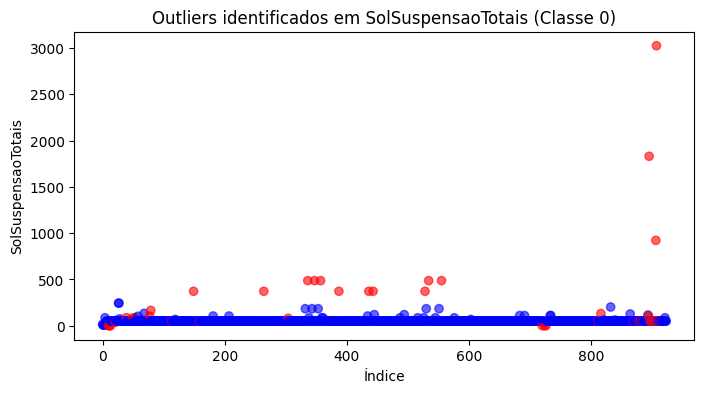

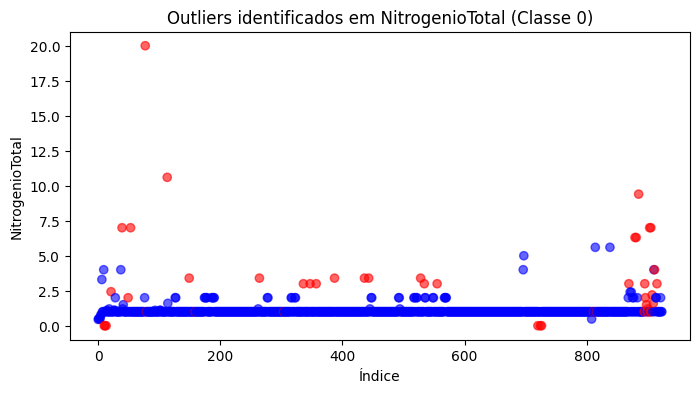

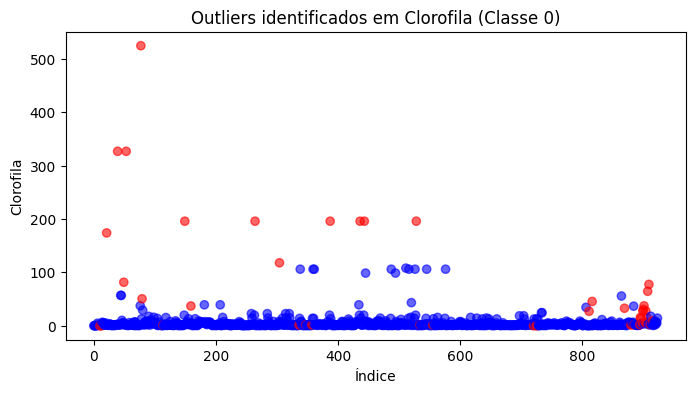

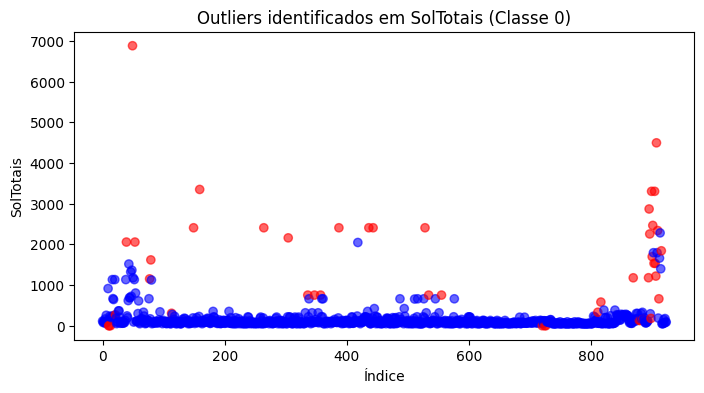

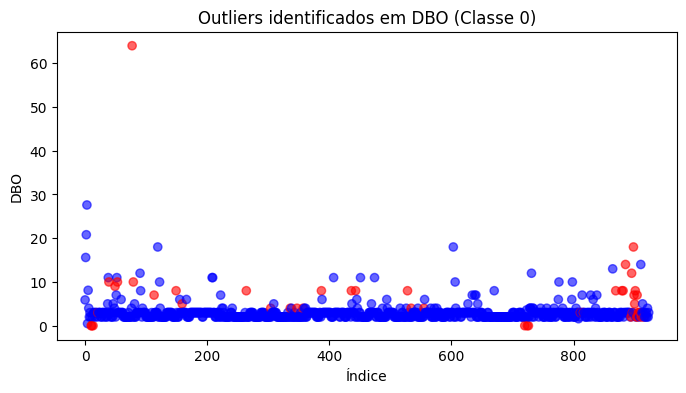

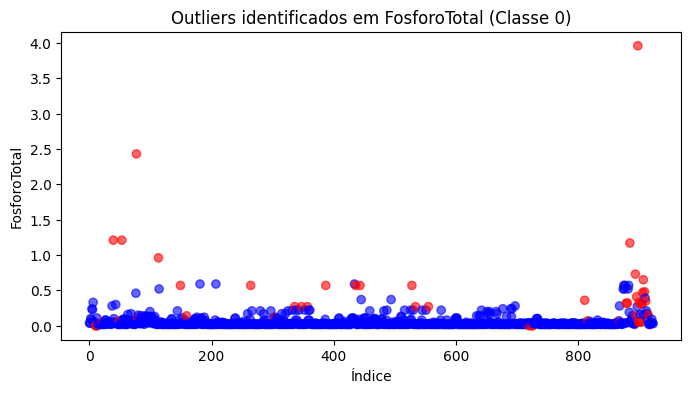

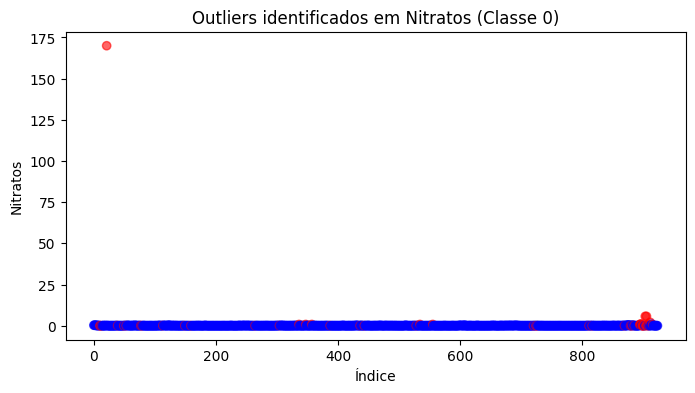

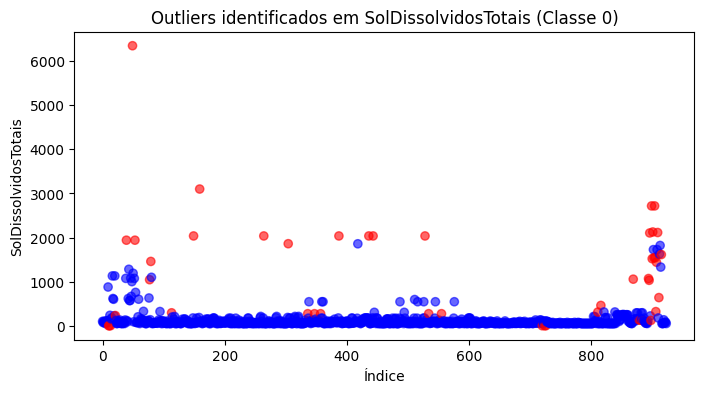

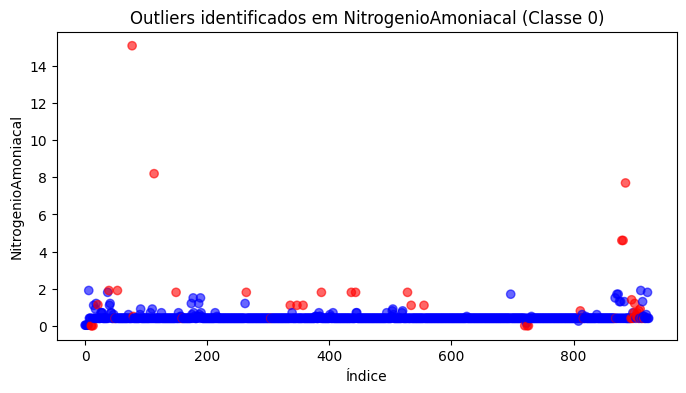

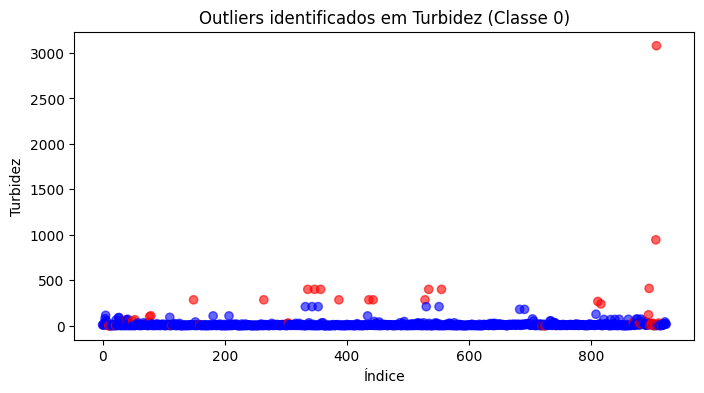

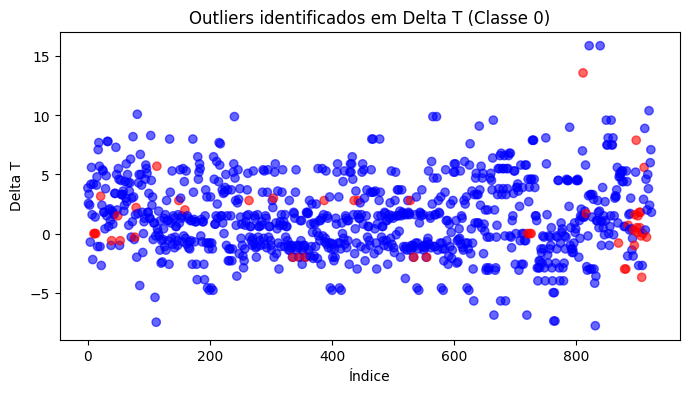

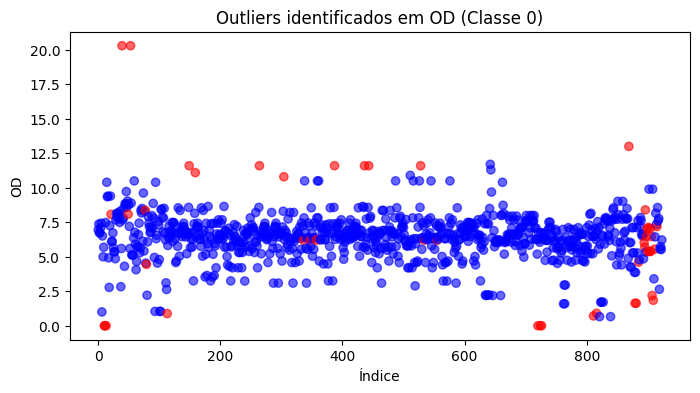

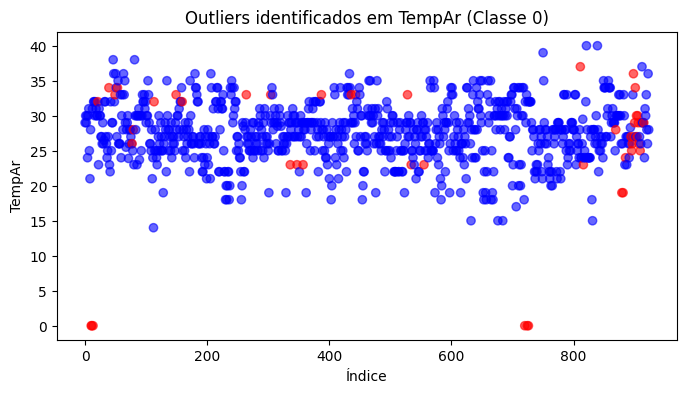

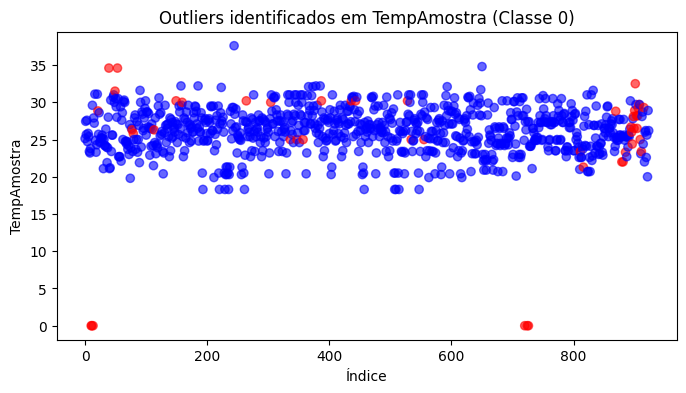

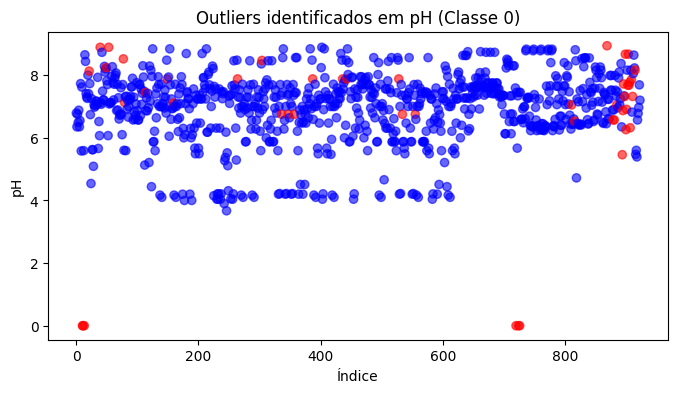

In [29]:
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

# Filtrar apenas a classe 0
df_class_0 = df_cylindrospermopsis_50_c0_dropado[df_cylindrospermopsis_50_c0_dropado['Classe'] == 0]

# Selecionar apenas colunas numéricas, excluindo as colunas binárias
exclude_columns = ['Verao', 'Inverno', 'Outono', 'Primavera', 'Classe', 'Resultado','Choveu']
numeric_columns = [col for col in df_class_0.select_dtypes(include=['float64', 'int64']).columns if col not in exclude_columns]

# Configuração do Isolation Forest
isolation_forest = IsolationForest(
    contamination=0.05,  # Proporção de outliers
    random_state=42  # Para reprodutibilidade
)

# Ajustar o modelo aos dados numéricos da classe 0
isolation_forest.fit(df_class_0[numeric_columns])

# Predizer os outliers (-1 = outlier, 1 = normal)
outliers = isolation_forest.predict(df_class_0[numeric_columns])

# Adicionar a classificação de outliers ao dataframe
df_class_0['Outlier'] = outliers

# Filtrar os dados para remover os outliers
df_class_0_cleaned = df_class_0[df_class_0['Outlier'] == 1]

# Exibir resumo
print(f"Linhas antes da remoção: {len(df_class_0)}")
print(f"Linhas após a remoção de outliers: {len(df_class_0_cleaned)}")

# Visualizar outliers para cada coluna numérica (exceto as binárias)
for col in numeric_columns:
    plt.figure(figsize=(8, 4))
    plt.scatter(
        range(len(df_class_0)),
        df_class_0[col],
        c=['red' if outlier == -1 else 'blue' for outlier in df_class_0['Outlier']],
        alpha=0.6
    )
    plt.title(f"Outliers identificados em {col} (Classe 0)")
    plt.ylabel(col)
    plt.xlabel("Índice")
    plt.show()

Linhas antes da remoção: 318
Linhas após a remoção de outliers: 302


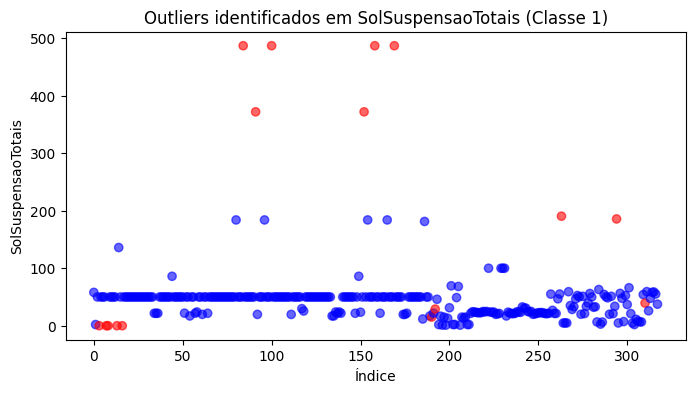

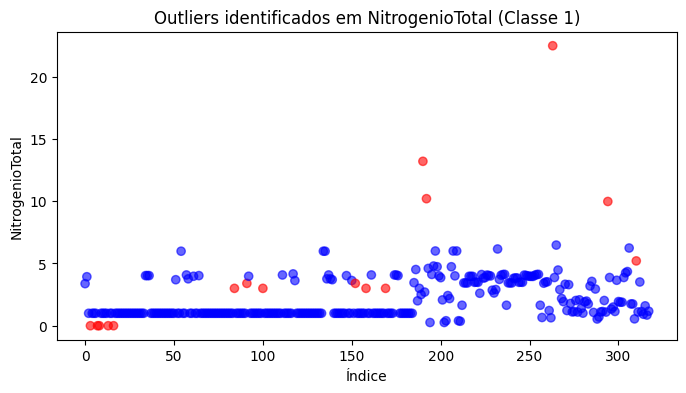

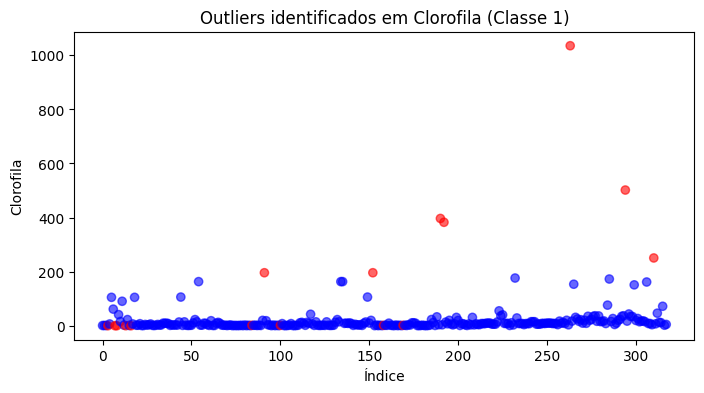

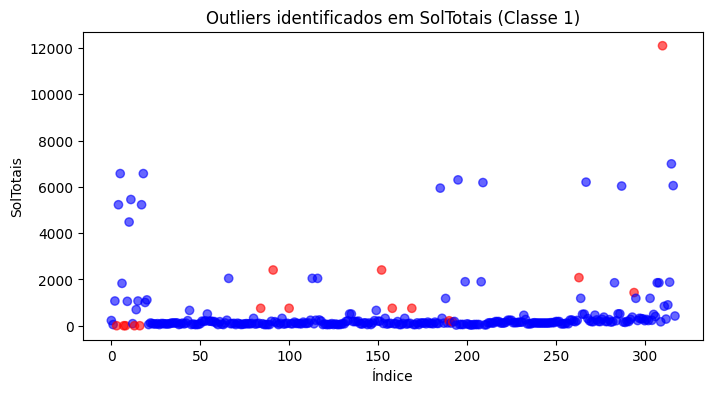

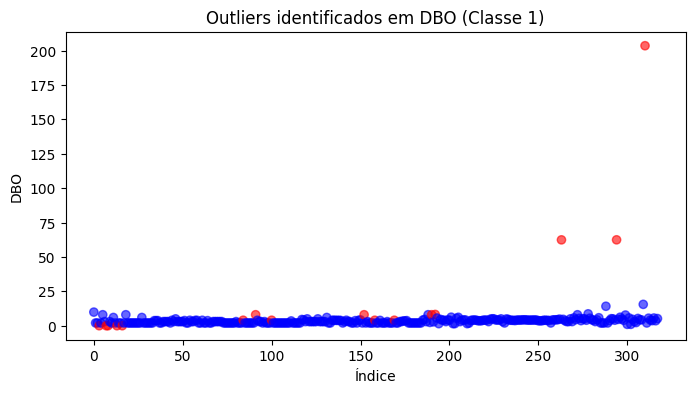

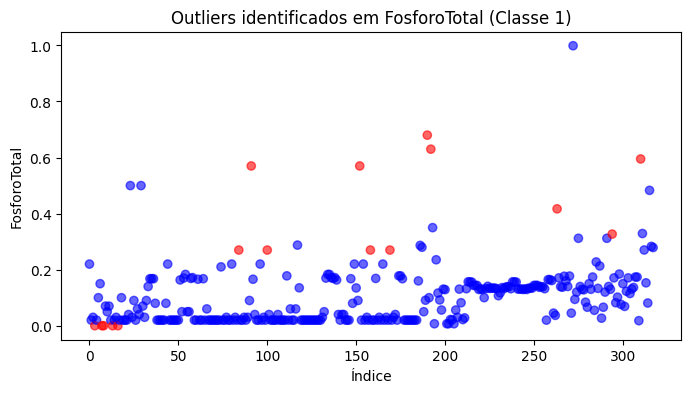

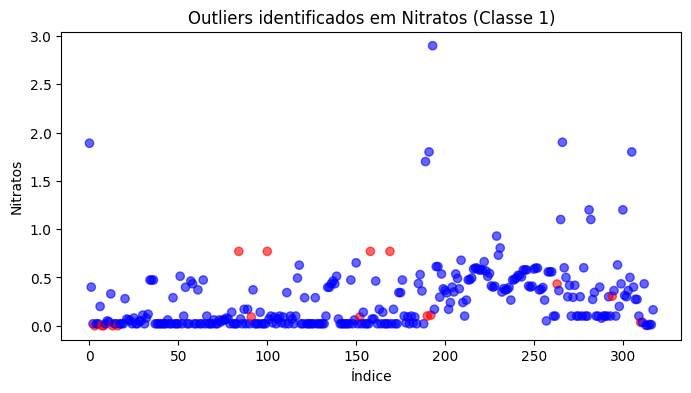

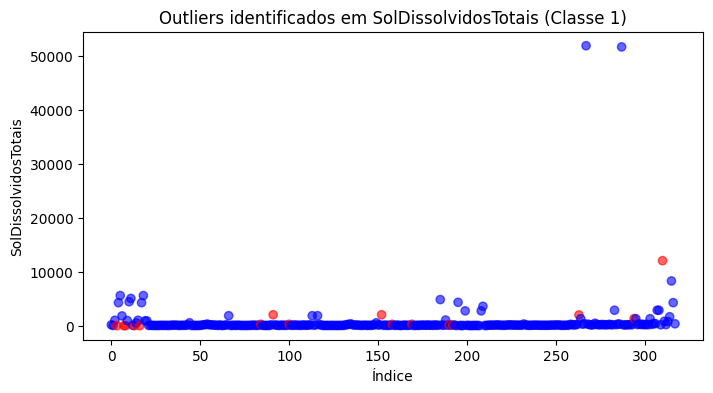

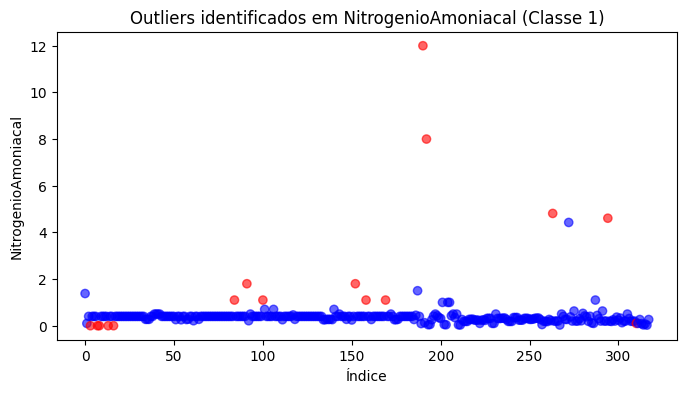

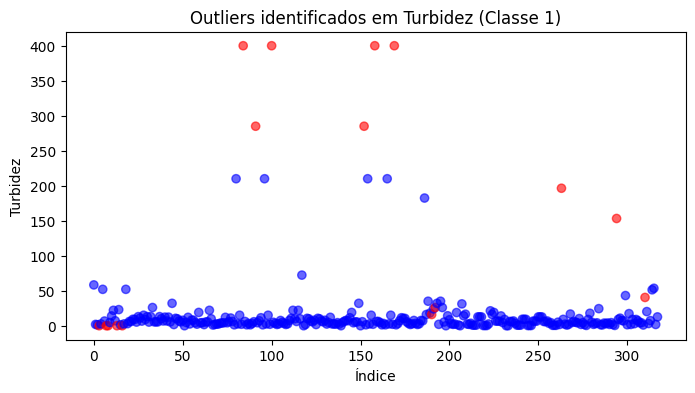

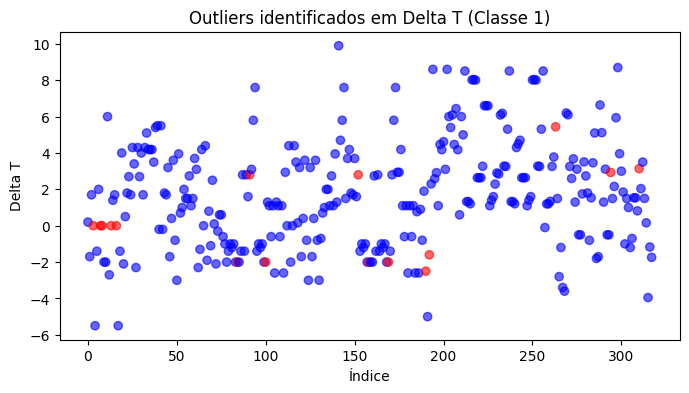

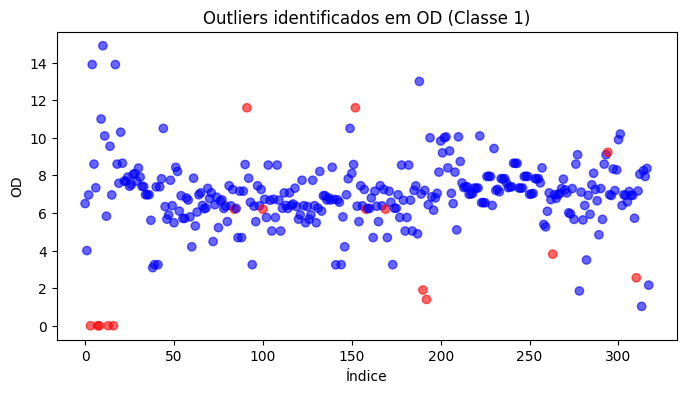

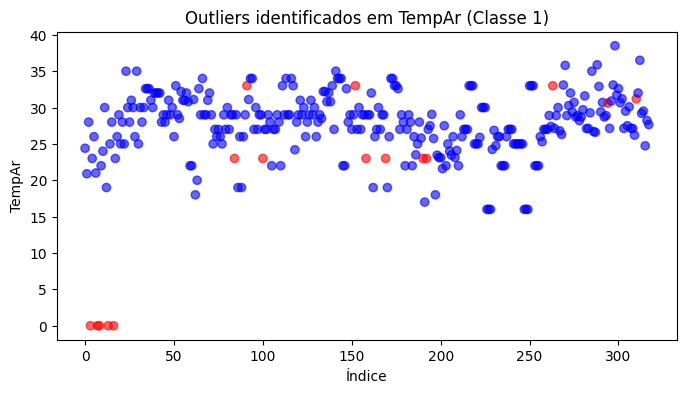

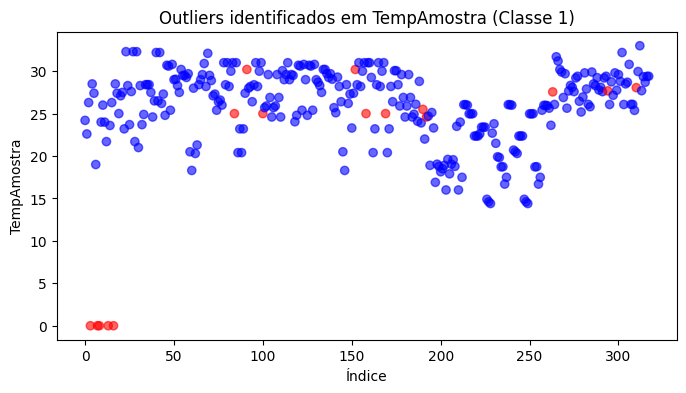

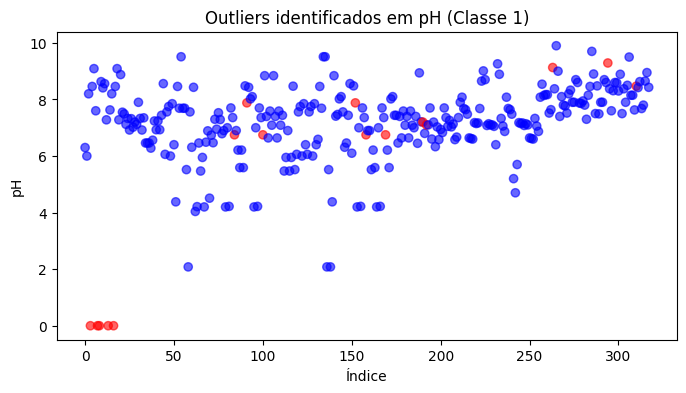

In [30]:
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

# Filtrar apenas a classe 1
df_class_1 = df_cylindrospermopsis_50_c1[df_cylindrospermopsis_50_c1['Classe'] == 1]

# Selecionar apenas colunas numéricas, excluindo as colunas irrelevantes
exclude_columns = ['Verao', 'Inverno', 'Outono', 'Primavera', 'Classe', 'Resultado']
numeric_columns = [col for col in df_class_1.select_dtypes(include=['float64', 'int64']).columns if col not in exclude_columns]

# Configuração do Isolation Forest
isolation_forest = IsolationForest(
    contamination=0.05,  # Proporção de outliers
    random_state=42  # Para reprodutibilidade
)

# Ajustar o modelo aos dados numéricos da classe 1
isolation_forest.fit(df_class_1[numeric_columns])

# Predizer os outliers (-1 = outlier, 1 = normal)
outliers = isolation_forest.predict(df_class_1[numeric_columns])

# Adicionar a classificação de outliers ao dataframe
df_class_1['Outlier'] = outliers

# Filtrar os dados para remover os outliers
df_class_1_cleaned = df_class_1[df_class_1['Outlier'] == 1]

# Exibir resumo
print(f"Linhas antes da remoção: {len(df_class_1)}")
print(f"Linhas após a remoção de outliers: {len(df_class_1_cleaned)}")

# Visualizar outliers para cada coluna numérica (exceto as excluídas)
for col in numeric_columns:
    plt.figure(figsize=(8, 4))
    plt.scatter(
        range(len(df_class_1)),
        df_class_1[col],
        c=['red' if outlier == -1 else 'blue' for outlier in df_class_1['Outlier']],
        alpha=0.6
    )
    plt.title(f"Outliers identificados em {col} (Classe 1)")
    plt.ylabel(col)
    plt.xlabel("Índice")
    plt.show()

In [31]:
  df_class_0_cleaned.describe()

,SolSuspensaoTotais,NitrogenioTotal,Clorofila,SolTotais,DBO,FosforoTotal,Nitratos,SolDissolvidosTotais,NitrogenioAmoniacal,Turbidez,Delta T,OD,TempAr,TempAmostra,pH,Primavera,Inverno,Outono,Verao,Classe,Date_x,Resultado,Outlier
count,877.000,877.000,877.000,877.000,877.000,877.000,877.000,877.000,877.000,877.000,877.000,877.000,877.000,877.000,877.000,877.000,877.000,877.000,877.000,877.000,877,877.000,877.000
mean,52.591,1.081,4.907,141.013,2.914,0.052,0.054,119.488,0.436,11.556,1.374,6.427,27.540,26.166,6.952,0.279,0.359,0.286,0.075,0.000,2019-02-09 08:58:33.797035264,4149.520,1.000
min,6.000,0.450,0.010,50.000,0.500,0.020,0.020,48.710,0.030,0.700,-7.800,0.660,14.000,18.300,3.670,0.000,0.000,0.000,0.000,0.000,2016-08-01 00:00:00,0.000,1.000
25%,50.000,1.000,0.760,60.000,2.000,0.020,0.020,50.000,0.400,3.500,-1.000,5.730,25.000,24.500,6.440,0.000,0.000,0.000,0.000,0.000,2018-06-11 00:00:00,0.000,1.000
50%,50.000,1.000,1.740,88.000,3.000,0.020,0.020,72.000,0.400,5.700,1.100,6.550,28.000,26.200,7.180,0.000,0.000,0.000,0.000,0.000,2018-10-18 00:00:00,1260.000,1.000
75%,50.000,1.000,4.020,129.000,3.000,0.040,0.060,104.000,0.400,11.000,3.600,7.240,30.000,28.000,7.620,1.000,1.000,1.000,0.000,0.000,2019-09-19 00:00:00,7040.000,1.000
max,244.000,5.600,108.000,2282.000,27.600,0.590,0.920,1858.000,1.900,210.000,15.900,11.700,40.000,37.600,8.890,1.000,1.000,1.000,1.000,0.000,2022-06-07 00:00:00,19500.000,1.000
std,17.177,0.401,12.775,210.082,1.953,0.077,0.072,189.524,0.179,22.242,3.194,1.497,4.028,2.820,1.082,0.449,0.480,0.452,0.264,0.000,NaN,5512.044,0.000


In [32]:
df_class_1_cleaned.describe()

,SolSuspensaoTotais,NitrogenioTotal,Clorofila,SolTotais,DBO,FosforoTotal,Nitratos,SolDissolvidosTotais,NitrogenioAmoniacal,Turbidez,Delta T,OD,TempAr,TempAmostra,pH,Primavera,Inverno,Outono,Verao,Classe,Date_x,Resultado,Outlier
count,302.000,302.000,302.000,302.000,302.000,302.000,302.000,302.000,302.000,302.000,302.000,302.000,302.000,302.000,302.000,302.000,302.000,302.000,302.000,302.000,302,302.000,302.000
mean,41.914,2.083,15.265,493.500,3.393,0.099,0.265,745.718,0.365,11.439,1.781,7.019,27.826,26.058,7.222,0.328,0.308,0.199,0.166,1.000,2019-03-14 23:17:05.165562880,127580.692,1.000
min,1.000,0.260,0.400,28.000,1.000,0.007,0.003,20.000,0.026,0.000,-5.500,1.030,16.000,14.400,2.080,0.000,0.000,0.000,0.000,1.000,2016-03-11 00:00:00,20000.000,1.000
25%,22.602,1.000,1.790,84.000,2.000,0.020,0.020,71.000,0.266,2.425,-0.600,6.288,26.000,23.925,6.640,0.000,0.000,0.000,0.000,1.000,2018-03-26 00:00:00,24643.500,1.000
50%,50.000,1.000,7.166,118.980,3.000,0.080,0.100,107.582,0.400,5.491,1.536,6.982,28.000,26.900,7.360,0.000,0.000,0.000,0.000,1.000,2018-10-24 00:00:00,36700.000,1.000
75%,50.000,3.510,14.450,236.757,4.096,0.144,0.412,181.671,0.400,10.476,3.600,7.785,30.000,29.230,7.936,1.000,1.000,0.000,0.000,1.000,2020-04-20 18:00:00,61950.000,1.000
max,184.000,6.475,176.406,6993.180,15.530,0.999,2.900,51860.000,4.426,210.000,9.900,14.900,38.500,33.000,9.900,1.000,1.000,1.000,1.000,1.000,2021-11-08 00:00:00,2648208.000,1.000
std,26.454,1.474,29.517,1223.525,1.684,0.099,0.347,4293.581,0.287,26.963,2.928,1.644,4.037,4.108,1.230,0.470,0.462,0.400,0.372,0.000,NaN,335019.538,0.000


In [ ]:
#df_class_0_cleaned = df_class_0_cleaned.drop('Choveu', axis=1)

In [33]:
df_cylindrospermopsis_0e1 = pd.concat([df_class_0_cleaned,df_class_1_cleaned])
df_cylindrospermopsis_0e1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1179 entries, 50 to 47
Data columns (total 29 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   SolSuspensaoTotais                  1179 non-null   float64       
 1   NitrogenioTotal                     1179 non-null   float64       
 2   Clorofila                           1179 non-null   float64       
 3   SolTotais                           1179 non-null   float64       
 4   DBO                                 1179 non-null   float64       
 5   FosforoTotal                        1179 non-null   float64       
 6   Nitratos                            1179 non-null   float64       
 7   SolDissolvidosTotais                1179 non-null   float64       
 8   NitrogenioAmoniacal                 1179 non-null   float64       
 9   Turbidez                            1179 non-null   float64       
 10  Delta T                       

In [34]:
df_cylindrospermopsis_0e1.to_csv('/content/drive/MyDrive/RESULTADOS MERGE 2/REMOVENDO NaN C0 E RFRegressor VALORES C1 (ELIMINANDO OUTLIERS COM ISOLATION FOREST)/CYLINDROSPERMOPSIS sp./Cópia de DF-BASE_cylindrospermopsis.csv', index=False)